In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import cv2
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm
import os
import shutil as sh
from IPython.display import Image, clear_output
import torch

In [2]:
%%time

!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 12251, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 12251 (delta 10), reused 14 (delta 8), pack-reused 12229
Receiving objects: 100% (12251/12251), 11.94 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (8480/8480), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 9.7 MB/s 
CPU times: user 86 ms, sys: 53.5 ms, total: 139 ms
Wall time: 8.74 s


In [32]:
# Train YOLOv5s on COCO128 for 3 epochs
!python yolov5/train.py --img 640 --batch 16 --epochs 25 --data /content/drive/MyDrive/yolo_v5/data.yaml # Train YOLOv5s on COCO128 for 3 epochs


wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolo_v5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0

In [33]:

!python yolov5/export.py --weights yolov5/runs/train/exp5/weights/best_5_epoch_25.pt --include torchscript onnx

export: data=yolov5/data/coco128.yaml, weights=['yolov5/runs/train/exp5/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from yolov5/runs/train/exp5/weights/best.pt with output shape (1, 25200, 8) (13.7 MB)

TorchScript: starting export with torch 1.11.0+cu113...
TorchScript: export success, saved as yolov5/runs/train/exp5/weights/best.torchscript (27.2 MB)

ONNX: starting export with onnx 1.11.0...
ONNX: export success, saved as yolov5/runs/train/exp5/weights/best.onnx (27.2 MB)

Export complete (5.45s)
Results saved to /cont

In [14]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.9 MB/s 
     |████████████████████████████████| 145 kB 44.2 MB/s 
     |████████████████████████████████| 181 kB 70.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=e066c0864558a6ad1f972e1fbf6638fd43b220375d89557358d347ff775f53d1
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


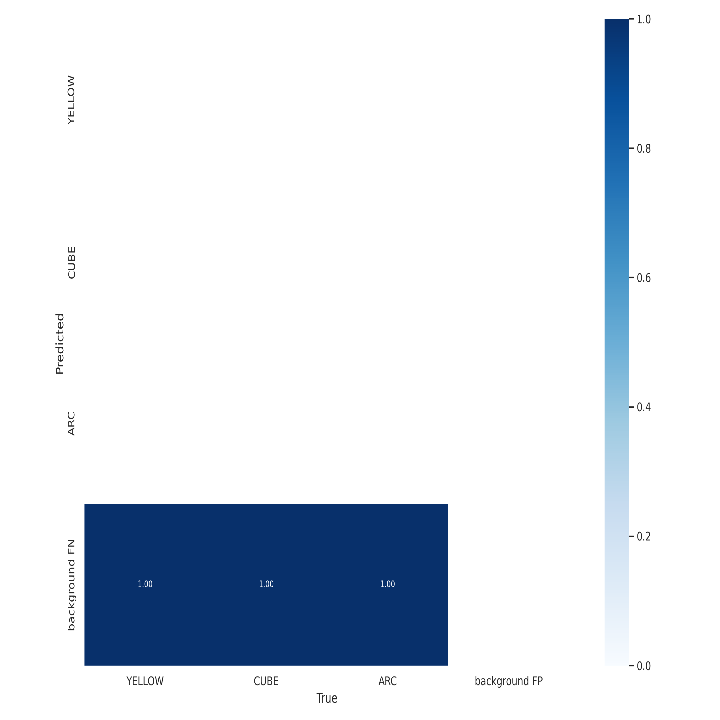

In [21]:
img = cv2.imread('/content/yolov5/runs/train/exp/confusion_matrix.png')
img = cv2.resize(img , (720,720))
cv2_imshow(img)

In [23]:
df = pd.read_csv('/content/yolov5/runs/train/exp/results.csv')
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.113660,0.03880,0.042337,0.004207,0.48642,0.007411,0.001589,0.099496,0.033618,0.038372,0.000500,0.000500,0.095500
1,1,0.105460,0.04330,0.038556,0.005372,0.67500,0.025706,0.007495,0.082622,0.033875,0.035610,0.000737,0.000737,0.089737
2,2,0.095382,0.04286,0.034099,0.006580,0.82494,0.045097,0.009182,0.077769,0.034077,0.029475,0.000578,0.000578,0.083578
